In [97]:
import timeit as t
from timeit import default_timer as timer
import numpy as np
import matplotlib.pyplot as plt
#### %matplotlib notebook
%matplotlib inline

# Setup styles for plotting
style_list = ['default', 'classic'] + sorted(
        style for style in plt.style.available if style != 'classic')
plt.style.use(style_list[10])
print(style_list)

['default', 'classic', 'Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [98]:
def FibonacciRec(N: int):
    if N < 2:
        return N
    return FibonacciRec(N - 1) + FibonacciRec(N - 2)

### 2.1 Merjenje časa izvajanja
Za pravilno meritev časa izvajanja bomo uporabljali funkcijo `timeit()`, namenjeno testiranju hitrosti manjših koščkov kode. Uporablja se na naslednji način, primer:
`t.timeit('quicksort(data)','from __main__ import data,quicksort', number = num)`

Prvi niz je ukaz, ki ga merimo, nato drugi niz definira importe oziroma knjižnice, nato pa še, kolikokrat želimo izvesti ta ukaz (večkrat je bolj zanesljiva meritev časa). 

In [99]:
fibNumber = 10
t_fib = t.timeit('FibonacciRec(fibNumber)', 'from __main__ import fibNumber, FibonacciRec', number=1)
print('Fibonacci for', fibNumber, 'execution time sec:', t_fib)

Fibonacci for 10 execution time sec: 1.083999995898921e-05


Fibonacci for  1  execution time sec:  9.149998732027598e-07
Fibonacci for  3  execution time sec:  1.520999830972869e-06
Fibonacci for  5  execution time sec:  1.7669999579084106e-06
Fibonacci for  7  execution time sec:  3.1489998946199194e-06
Fibonacci for  9  execution time sec:  6.672999916190747e-06
Fibonacci for  10  execution time sec:  8.879999768396374e-06
Fibonacci for  11  execution time sec:  1.3902999853598885e-05
Fibonacci for  12  execution time sec:  2.182400021411013e-05
Fibonacci for  13  execution time sec:  5.010900076740654e-05
Fibonacci for  14  execution time sec:  8.518499998899642e-05
Fibonacci for  15  execution time sec:  0.0001342410005236161
Fibonacci for  16  execution time sec:  0.0002333430002181558
Fibonacci for  17  execution time sec:  0.0003043990000151098
Fibonacci for  18  execution time sec:  0.0005634109993479797
Fibonacci for  19  execution time sec:  0.0009134609999819077
Fibonacci for  20  execution time sec:  0.0011038320008083247
Fibonacci 

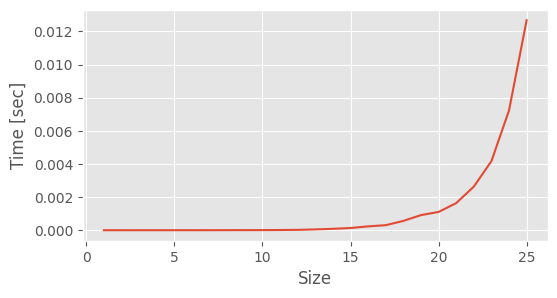

In [100]:
# 2.3 Plot graph of Fibonnaci execution time

size = np.array([]) #this array will store the current dataset size
t_list = np.array([]) #store processing time here
num = 1 #evaluation repetition (keep at 1 for now)

n_list = [1,3,5,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]

# Test execution time for different n values
for n in n_list:
    # Store the size
    size = np.append(size, n)
    
    # Measure execution time
    t_fib = t.timeit('FibonacciRec(n)', 'from __main__ import n, FibonacciRec', number=num)
    t_list = np.append(t_list, t_fib)
    print('Fibonacci for ', n, ' execution time sec: ', t_fib)

# Plot results
ax = plt.figure(figsize=[6,3])
plt.plot(size, t_list)
plt.xlabel('Size')
plt.ylabel('Time [sec]')
plt.show()


In [123]:
# 2.4 Class for algorithm testing
from utils import Algorithm

# Testing
a = Algorithm()
a.run(ntimes=5)


Algorithm.run_once, operations:  10
 >>  0 , msec: 0.038 , operations:  10
Algorithm.run_once, operations:  10
 >>  1 , msec: 0.008 , operations:  10
Algorithm.run_once, operations:  10
 >>  2 , msec: 0.008 , operations:  10
Algorithm.run_once, operations:  10
 >>  3 , msec: 0.008 , operations:  10
Algorithm.run_once, operations:  10
 >>  4 , msec: 0.007 , operations:  10
 >>>  Algorithm  > Total run() sec:  0.00016592299925832776  Avg iter msec: 0.03318459985166555


{'name': 'Algorithm',
 'avg_msec': 0.03318459985166555,
 'avg_O': 10.0,
 'niter': 5,
 'output': []}

 >>  0 , msec: 0.033 , operations:  177
 >>  1 , msec: 0.026 , operations:  177
 >>  2 , msec: 0.022 , operations:  177
 >>  3 , msec: 0.021 , operations:  177
 >>  4 , msec: 0.021 , operations:  177
 >>  5 , msec: 0.022 , operations:  177
 >>  6 , msec: 0.021 , operations:  177
 >>  7 , msec: 0.021 , operations:  177
 >>  8 , msec: 0.021 , operations:  177
 >>  9 , msec: 0.021 , operations:  177
 >>>  FibonacciRecursion  > Total run() sec:  0.0005467689998113201  Avg iter msec: 0.05467689998113201
Test result:  {'name': 'FibonacciRecursion', 'avg_msec': 0.05467689998113201, 'avg_O': 177.0, 'niter': 10, 'output': 55}
 >>  0 , msec: 0.002 , operations:  0
 >>>  QuickSort  > Total run() sec:  3.7972999962221365e-05  Avg iter msec: 0.037972999962221365
N=1, Best case (sorted): 0.0380ms
 >>  0 , msec: 0.001 , operations:  0
 >>>  QuickSort  > Total run() sec:  2.284800029883627e-05  Avg iter msec: 0.02284800029883627
N=5, Best case (sorted): 0.0228ms
 >>  0 , msec: 0.001 , operations:  0
 

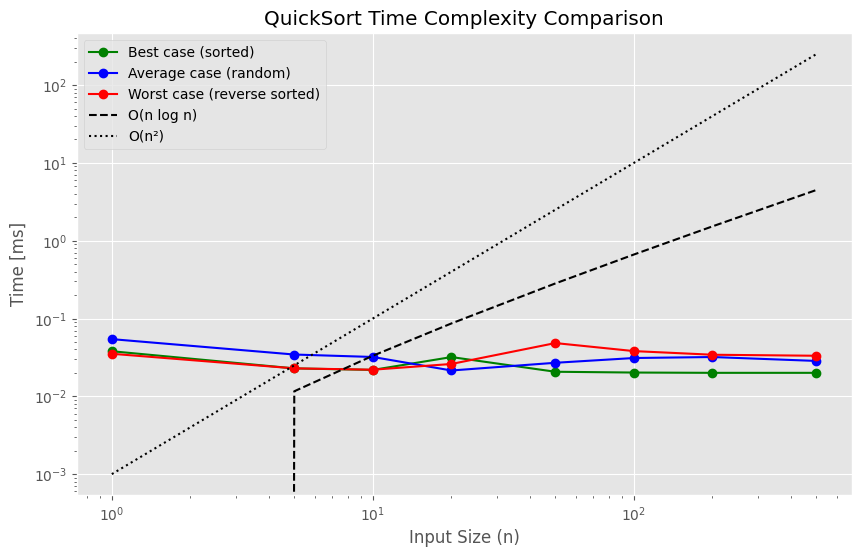

In [102]:
# 2.5  Fibonnaci algoritem z uporabo Alogrithm
# Prva verzija, kjer je N dolocen s stevilom ponovitev

class FibonacciRecursion(Algorithm):
    def __init__(self):
        self.name = "FibonacciRecursion"

    # Function to find Nth Fibonacci term
    def FibonacciR(self, N:int):
        # Count each call of the function
        self.count_op += 1

        # Base Case
        if (N < 2):
            return N

        # Recursively computing the term
        # using recurrence relation
        return self.FibonacciR(N - 1) + self.FibonacciR(N - 2)

    def run_once(self):

        N = self.data_params['N']
        self.result_data = self.FibonacciR(N)

        return self.result_data


s = FibonacciRecursion()
s.data_params = {'N': 10}
print('Test result: ', s.run(10))

# 2.7 Graph comparison of QuickSort complexity
size = np.array([])
t_list = np.array([])
oper_list = np.array([])
num = 1

# Define test sizes
n_list = [1, 5, 10, 20, 50, 100, 200, 500]

# Initialize QuickSort algorithm
s = QuickSort()

# Test three scenarios: best, average, worst case
scenarios = {
    1: ("Best case (sorted)", 'g-o'),
    0: ("Average case (random)", 'b-o'),
    2: ("Worst case (reverse sorted)", 'r-o')
}

plt.figure(figsize=(10, 6))

for type_id, (scenario_name, style) in scenarios.items():
    size = np.array([])
    t_list = np.array([])
    
    for n in n_list:
        size = np.append(size, n)
        s.data_params = {'size': n, 'type': type_id}
        result = s.run(num)
        t_list = np.append(t_list, result['avg_msec'])
        print(f'N={n}, {scenario_name}: {result["avg_msec"]:.4f}ms')
    
    plt.plot(size, t_list, style, label=scenario_name)

# Add theoretical complexity curves
x = np.array(n_list)
plt.plot(x, 0.001 * x * np.log2(x), 'k--', label='O(n log n)')
plt.plot(x, 0.001 * x * x, 'k:', label='O(n²)')

plt.xlabel('Input Size (n)')
plt.ylabel('Time [ms]')
plt.title('QuickSort Time Complexity Comparison')
plt.grid(True)
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.show()


 >>  0 , msec: 0.005 , operations:  1
 >>>  FibonacciRecursion  > Total run() sec:  0.00015098999938345514  Avg iter msec: 0.15098999938345514
N= 1 time: 0.15098999938345514 operations: 1.0
 >>  0 , msec: 0.003 , operations:  5
 >>>  FibonacciRecursion  > Total run() sec:  2.7119000151287764e-05  Avg iter msec: 0.027119000151287764
N= 3 time: 0.027119000151287764 operations: 5.0
 >>  0 , msec: 0.003 , operations:  15
 >>>  FibonacciRecursion  > Total run() sec:  2.3286999748961534e-05  Avg iter msec: 0.023286999748961534
N= 5 time: 0.023286999748961534 operations: 15.0
 >>  0 , msec: 0.036 , operations:  177
 >>>  FibonacciRecursion  > Total run() sec:  7.470299988199258e-05  Avg iter msec: 0.07470299988199258
N= 10 time: 0.07470299988199258 operations: 177.0
 >>  0 , msec: 0.356 , operations:  1973
 >>>  FibonacciRecursion  > Total run() sec:  0.000405549999413779  Avg iter msec: 0.405549999413779
N= 15 time: 0.405549999413779 operations: 1973.0
 >>  0 , msec: 3.415 , operations:  218

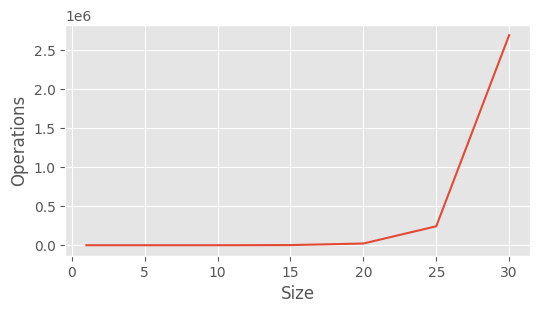

In [103]:
# 2.6 Testing Fibonacci recursion

size = np.array([]) #this array will store the current dataset size
t_list = np.array([]) #store processing time here
oper_list = np.array([]) #store processing operations here
num = 1 # evaluation repetition (keep at 1 for now)

n_list = [1,3,5,10,15,20,25,30]

s = FibonacciRecursion()
s.data_params = {'N': 1}

for n in n_list:
    # Store the size
    size = np.append(size, n)
    
    # Set parameters and run
    s.data_params = {'N': n}
    result = s.run(num)
    
    # Store results
    t_list = np.append(t_list, result['avg_msec'])
    oper_list = np.append(oper_list, result['avg_O'])
    print('N=', n, 'time:', result['avg_msec'], 'operations:', result['avg_O'])




ax = plt.figure(figsize=[6,3])
plt.plot(size, oper_list)

plt.xlabel('Size')
plt.ylabel('Operations')

plt.show()

In [124]:
# 2.7 Fibonnaci algorithm optimized

class FibonacciOptimized(Algorithm):
    def __init__(self):
        self.name = "FibonacciOptimized"

    # Function to find Nth Fibonacci term
    def Fibonacci(self, N):
        f=[0]*(N + 2)
        # 0th and 1st number of the
        # series are 0 and 1
        f[0] = 0
        f[1] = 1
        # Iterate over the range [2, N]
        for i in range(2,N+1) :
            self.count_op += 1
            # Add the previous 2 numbers
            # in the series and store it
            f[i] = f[i - 1] + f[i - 2]
        # Return Nth Fibonacci Number
        return f[N]

    def run_once(self):

        N = self.data_params['N']
        self.result_data = self.Fibonacci(N)

        return self.result_data


s = FibonacciOptimized()
s.data_params = {'N': 10}
print(s.run(1))



 >>  0 , msec: 0.006 , operations:  9
 >>>  FibonacciOptimized  > Total run() sec:  8.81790001585614e-05  Avg iter msec: 0.0881790001585614
{'name': 'FibonacciOptimized', 'avg_msec': 0.0881790001585614, 'avg_O': 9.0, 'niter': 1, 'output': 55}


In [125]:
# 2.7 Fibonnaci algorithm optimized

class FibonacciOptimized(Algorithm):
    def __init__(self):
        self.name = "FibonacciOptimized"

    # Function to find Nth Fibonacci term
    def Fibonacci(self, N):
        f=[0]*(N + 2)
        # 0th and 1st number of the
        # series are 0 and 1
        f[0] = 0
        f[1] = 1
        # Iterate over the range [2, N]
        for i in range(2,N+1) :
            self.count_op += 1
            # Add the previous 2 numbers
            # in the series and store it
            f[i] = f[i - 1] + f[i - 2]
        # Return Nth Fibonacci Number
        return f[N]

    def run_once(self):

        N = self.data_params['N']
        self.result_data = self.Fibonacci(N)

        return self.result_data


s = FibonacciOptimized()
s.data_params = {'N': 10}
print(s.run(1))



 >>  0 , msec: 0.006 , operations:  9
 >>>  FibonacciOptimized  > Total run() sec:  8.207500013668323e-05  Avg iter msec: 0.08207500013668323
{'name': 'FibonacciOptimized', 'avg_msec': 0.08207500013668323, 'avg_O': 9.0, 'niter': 1, 'output': 55}


### 3. Sortirni algoritmi

Testiramo in primerjamo delovanje različnih algoritmov sortiranja števil od najmanjšega do največjega. Pri tem imamo več scenarijev, glede na vhodne podatke:
* **optimalni**, v tem primeru so števila že urejena v želenem vrstnem redu
* **najslabši**, podatki so urejeni v obratnem vrstnem redu kot želimo
* **normalni**, podatki so urejeni naključno.


In [106]:
def insertionSort2(array):
    d = array.copy()
    for j in range(1, len(d)):
        key = d[j]
        i = j - 1
        while i >= 0 and d[i] > key:
            d[i + 1] = d[i]
            i = i - 1
        d[i + 1] = key
    return d

In [107]:
# Vrne set podatkov
def createSet(type = None, size = 100):
    if type == 1:  #return numbers sorted in ascening order -> best case
        return np.linspace(1,size,size).tolist() 
    elif type == 2: #return numbers in descending order -> wost case
        return np.linspace(size,1,size).tolist()
    else: #return a random assortment of numbers
        return (np.trunc(np.absolute(size*10/2.0 + size*10/5.0*np.random.randn(size)))/10).tolist()

In [108]:
# 3.1 Preskus parametrov type, size: izpiši dobljene podatke
print("Type 1 (sorted ascending):")
print(createSet(type=1, size=10))

print("\nType 2 (sorted descending):")
print(createSet(type=2, size=10))

print("\nType None (random):")
print(createSet(type=None, size=10))

Type 1 (sorted ascending):
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

Type 2 (sorted descending):
[10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0]

Type None (random):
[5.4, 8.1, 3.0, 2.7, 4.9, 6.5, 4.9, 8.8, 7.3, 3.0]


In [109]:
# 3.3 Preskus insertionSort2
test_data = createSet(type=2, size=10)  # descending order
print("Original data:", test_data)
sorted_data = insertionSort2(test_data)
print("Sorted data:", sorted_data)


Original data: [10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0]
Sorted data: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]


In [110]:
class InsertionSort(Algorithm):
    def __init__(self):
        self.name = "Insertion Sort"

    def create_data(self):
        sz = self.data_params.get('size')
        typ = self.data_params.get('type')
        if (sz != None) and (typ != None):
            self.input_data = createSet(size = sz, type = typ)
        else:
            self.input_data = createSet()

    def insertionSort(self, array):
        d = array.copy()
        for j in range(1, len(d)):
            key = d[j]
            i = j - 1
            while i >= 0 and d[i] > key:
                self.count_op+=1
                d[i + 1] = d[i]
                i = i - 1
            d[i + 1] = key
        return d


    def run_once(self):
        self.result_data = self.insertionSort(self.input_data)
        return self.result_data

In [111]:
# 3.4 Testiraj InsertionSort razred

s = InsertionSort()
s.data_params = {'size': 1000, 'type': 2}

print(s.run(10))

print('Unsorted data: ', s.input_data)
print('Sorted data: ', s.result_data)


 >>  0 , msec: 86.647 , operations:  499500
 >>  1 , msec: 69.778 , operations:  499500
 >>  2 , msec: 71.835 , operations:  499500
 >>  3 , msec: 69.908 , operations:  499500
 >>  4 , msec: 72.286 , operations:  499500
 >>  5 , msec: 76.741 , operations:  499500
 >>  6 , msec: 72.250 , operations:  499500
 >>  7 , msec: 73.172 , operations:  499500
 >>  8 , msec: 72.575 , operations:  499500
 >>  9 , msec: 72.694 , operations:  499500
 >>>  Insertion Sort  > Total run() sec:  0.7390844199999265  Avg iter msec: 73.90844199999265
{'name': 'Insertion Sort', 'avg_msec': 73.90844199999265, 'avg_O': 499500.0, 'niter': 10, 'output': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 6

 >>  0 , msec: 0.043 , operations:  0
 >>>  Insertion Sort  > Total run() sec:  0.00010900399956881301  Avg iter msec: 0.10900399956881301
N= 1 time: 0.10900399956881301 operations: 0.0
 >>  0 , msec: 0.031 , operations:  45
 >>>  Insertion Sort  > Total run() sec:  5.337200036592549e-05  Avg iter msec: 0.05337200036592549
N= 10 time: 0.05337200036592549 operations: 45.0
 >>  0 , msec: 0.039 , operations:  190
 >>>  Insertion Sort  > Total run() sec:  5.927900019742083e-05  Avg iter msec: 0.05927900019742083
N= 20 time: 0.05927900019742083 operations: 190.0
 >>  0 , msec: 0.152 , operations:  1225
 >>>  Insertion Sort  > Total run() sec:  0.00017312799991486827  Avg iter msec: 0.17312799991486827
N= 50 time: 0.17312799991486827 operations: 1225.0
 >>  0 , msec: 0.652 , operations:  4950
 >>>  Insertion Sort  > Total run() sec:  0.0006736859995726263  Avg iter msec: 0.6736859995726263
N= 100 time: 0.6736859995726263 operations: 4950.0
 >>  0 , msec: 2.309 , operations:  19900
 >>>  Inse

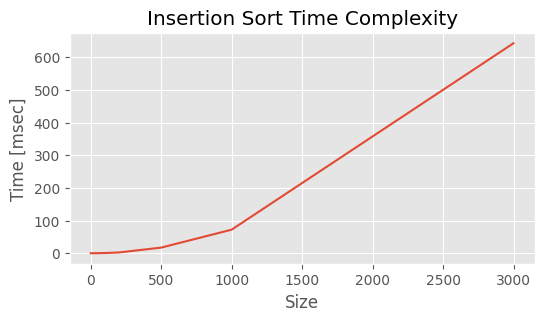

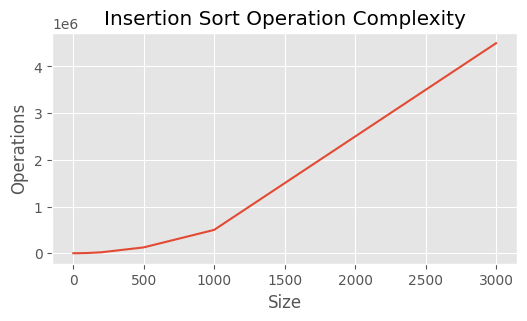

In [112]:
size = np.array([]) #this array will store the current dataset size
t_list = np.array([]) #store processing time here
oper_list = np.array([]) #store processing time here
num = 1 #evaluation repetition (keep at 1 for now)

n_list = [1,10,20,50,100,200,500,1000,3000]

s = InsertionSort()

for n in n_list:
    # Store the size
    size = np.append(size, n)
    
    # Set parameters and run
    s.data_params = {'size': n, 'type': 2}  # worst case - descending order
    result = s.run(num)
    
    # Store results
    t_list = np.append(t_list, result['avg_msec'])
    oper_list = np.append(oper_list, result['avg_O'])
    print('N=', n, 'time:', result['avg_msec'], 'operations:', result['avg_O'])

# Plot execution time
plt.figure(figsize=[6,3])
plt.plot(size, t_list)
plt.xlabel('Size')
plt.ylabel('Time [msec]')
plt.title('Insertion Sort Time Complexity')
plt.show()

# Plot operations count
plt.figure(figsize=[6,3])
plt.plot(size, oper_list)
plt.xlabel('Size')
plt.ylabel('Operations')
plt.title('Insertion Sort Operation Complexity')
plt.show()

/home/urban/Faks/Optimizacija v telekomunikacijah/Vaje/vaja3/utils.py:102: RuntimeWarning: overflow encountered in float_power
  res['O(2^n)'] = [np.float_power(2.0, n) for n in n_list]
/home/urban/Faks/Optimizacija v telekomunikacijah/Vaje/venv/lib/python3.12/site-packages/matplotlib/scale.py:270: RuntimeWarning: overflow encountered in power
  return np.power(self.base, values)
/home/urban/Faks/Optimizacija v telekomunikacijah/Vaje/vaja3/utils.py:86: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, ymax)


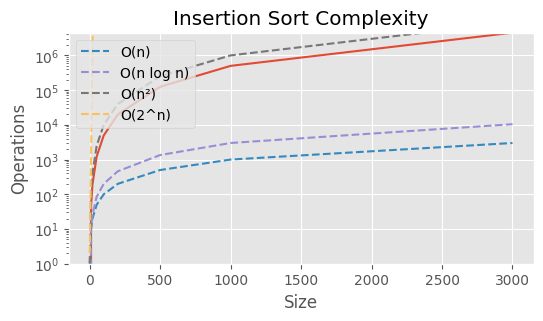

In [113]:
# Plot with new utilities
from utils import AlgorithmBenchmark
perf = AlgorithmBenchmark()
ref1 = perf.generate_reference_curves(n_list, num_curves=4)
perf.plot_complexity(n_list, oper_list, ref1, title='Insertion Sort Complexity', ymax=max(oper_list), yscale='log')


In [114]:
def quicksort(arr):
    """ Quicksort a list

    :type arr: list
    :param arr: List to sort
    :returns: list -- Sorted list
    """
    if len(arr) <= 1:
        return arr
    else:
        return quicksort([x for x in arr[1:] if x<arr[0]]) + [arr[0]] + quicksort([x for x in arr[1:] if x>=arr[0]])

In [115]:
class QuickSort(Algorithm):
    def __init__(self):
        self.name = "Quick Sort"

    def create_data(self):
        sz = self.data_params.get('size')
        typ = self.data_params.get('type')
        if (sz != None) and (typ != None):
            self.input_data = createSet(size = sz, type = typ)
        else:
            self.input_data = createSet()


    # Function to find the partition position
    def partition(self, array, low, high):
    
        # Choose the rightmost element as pivot
        pivot = array[high]
    
        # Pointer for greater element
        i = low - 1
    
        # Traverse through all elements
        # compare each element with pivot
        for j in range(low, high):
            if array[j] <= pivot:
    
                # If element smaller than pivot is found
                # swap it with the greater element pointed by i
                i = i + 1
    
                # Swapping element at i with element at j
                (array[i], array[j]) = (array[j], array[i])
                self.count_op+=1
    
        # Swap the pivot element with
        # the greater element specified by i
        (array[i + 1], array[high]) = (array[high], array[i + 1])
        self.count_op+=1
    
        # Return the position from where partition is done
        return i + 1
 
 
    # Function to perform quicksort
    def quicksort(self, array, low, high):
        if low < high:
    
            # Find pivot element such that
            # element smaller than pivot are on the left
            # element greater than pivot are on the right
            pi = self.partition(array, low, high)
    
            # Recursive call on the left of pivot
            self.quicksort(array, low, pi - 1)
    
            # Recursive call on the right of pivot
            self.quicksort(array, pi + 1, high)


    def run_once(self):
        N = len(self.input_data)
        self.result_data = self.quicksort(self.input_data, 0, N-1)
        return self.result_data

Algorithm.run_once, operations:  10
 >>  0 , msec: 0.071 , operations:  10
 >>>  QuickSort  > Total run() sec:  0.0001467749998482759  Avg iter msec: 0.1467749998482759
Size: 10, Type: None, Operations: 10
Algorithm.run_once, operations:  10
 >>  0 , msec: 0.016 , operations:  10
 >>>  QuickSort  > Total run() sec:  4.8814000365382526e-05  Avg iter msec: 0.048814000365382526
Size: 20, Type: None, Operations: 10
Algorithm.run_once, operations:  10
 >>  0 , msec: 0.034 , operations:  10
 >>>  QuickSort  > Total run() sec:  6.967500030441443e-05  Avg iter msec: 0.06967500030441443
Size: 50, Type: None, Operations: 10
Algorithm.run_once, operations:  10
 >>  0 , msec: 0.015 , operations:  10
 >>>  QuickSort  > Total run() sec:  8.215500020014588e-05  Avg iter msec: 0.08215500020014588
Size: 100, Type: None, Operations: 10
Algorithm.run_once, operations:  10
 >>  0 , msec: 0.028 , operations:  10
 >>>  QuickSort  > Total run() sec:  8.115899981930852e-05  Avg iter msec: 0.08115899981930852


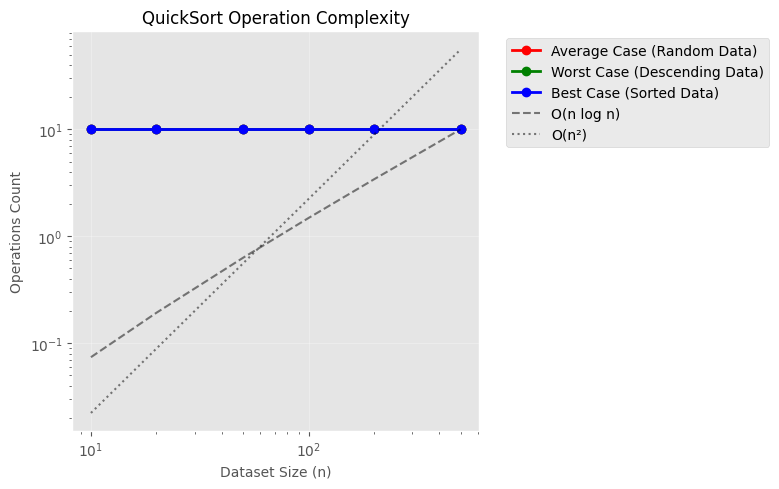

In [128]:
# Make sure QuickSort properly counts operations
class QuickSort(Algorithm):
    def __init__(self):
        super().__init__()
        self.name = "QuickSort"
        self.count_op = 0

    def partition(self, array, low, high):
        self.count_op += 1  # Count partition operation
        pivot = array[high]
        i = low - 1
        
        for j in range(low, high):
            self.count_op += 1  # Count comparison
            if array[j] <= pivot:
                i += 1
                array[i], array[j] = array[j], array[i]
                self.count_op += 1  # Count swap
        
        array[i + 1], array[high] = array[high], array[i + 1]
        return i + 1

# Define test cases and parameters
test_cases = [
    ("Average Case (Random Data)", None),
    ("Worst Case (Descending Data)", 2),
    ("Best Case (Sorted Data)", 1)
]

# Define input sizes
n_list = [10, 20, 50, 100, 200, 500]  # Adjusted size range

# Create figure with specific size and DPI
plt.figure(figsize=[8, 5], dpi=100)
colors = ['r', 'g', 'b']

# Clear any existing plots before creating new ones
plt.clf()

# Plot each test case
for idx, (test_label, typ) in enumerate(test_cases):
    op_list = []
    for size_val in n_list:
        qs_test = QuickSort()
        qs_test.data_params = {'size': size_val, 'type': typ}
        qs_test.create_data()
        qs_test.count_op = 0
        qs_test.run(ntimes=1)
        op_list.append(qs_test.count_op)
        print(f"Size: {size_val}, Type: {typ}, Operations: {qs_test.count_op}")  # Debug print
    
    print(f"Plotting {test_label} with operations: {op_list}")  # Debug print
    plt.plot(n_list, op_list, 
             marker='o', 
             color=colors[idx], 
             label=test_label,
             linewidth=2,
             markersize=6)

# Scale theoretical curves to match actual operation counts
max_ops = max(op_list)
scale_factor = max_ops / (max(n_list) * np.log2(max(n_list)))

# Add theoretical complexity curves
x = np.array(n_list)
plt.plot(x, scale_factor * x * np.log2(x), 'k--', label='O(n log n)', alpha=0.5)
plt.plot(x, scale_factor * x * x / 10, 'k:', label='O(n²)', alpha=0.5)

# Customize plot appearance
plt.xlabel("Dataset Size (n)", fontsize=10)
plt.ylabel("Operations Count", fontsize=10)
plt.title("QuickSort Operation Complexity", fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Use logarithmic scales
plt.yscale('log')
plt.xscale('log')

# Adjust layout to prevent cut-off
plt.tight_layout()

# Show plot
plt.show()